## Explore neutral ocean package
https://github.com/geoffstanley/neutralocean

And compare to http://www.teos-10.org/preteos10_software/gamma_GP.html

In [2]:
import pickle
import numpy as np

In [3]:
old_pkl = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/input_microstructure.pkl"

with open(old_pkl, 'rb') as file:
    arr = pickle.load(file)

Using from GP matlab file

In [4]:
gamma_ds = arr
[latmesh, Zmesh]=np.meshgrid(gamma_ds.lat,gamma_ds.depth);


In [ ]:
[lonmesh, Zmesh]=np.meshgrid(gamma_ds.lon,gamma_ds.depth);

In [ ]:
gamma = gamma_GP_from_SP_pt(S,T,pressure,lonmesh,latmesh);

In [3]:
arr.gamma

0         28.214811
1         28.212467
2         28.211014
3         28.209791
4         28.208130
            ...    
188128    28.042277
188129    28.043177
188130    28.044395
188131    28.043852
188132    28.043599
Name: gamma, Length: 188133, dtype: float64

In [8]:
arr

,T,S,z,gamma,dTdz,dSdz,lat,lon,log_eps,log_kappa,log_N2_sort,hab,depth,cruise,profile
0,0.594316,34.733891,-3835.0,28.214811,0.002297,0.000235,-25.002001,-38.185333,-10.260384,-5.217481,-5.741873,93.0,-3928.0,1,0
1,0.621936,34.736645,-3825.0,28.212467,0.002297,0.000235,-25.002001,-38.185333,-10.004366,-4.961463,-5.741873,103.0,-3928.0,1,0
2,0.640263,34.738594,-3815.0,28.211014,0.001747,0.000191,-25.002001,-38.185333,-9.833233,-4.638316,-5.893887,113.0,-3928.0,1,0
3,0.656876,34.740475,-3805.0,28.209791,0.001718,0.000172,-25.002001,-38.185333,-10.048473,-4.886051,-5.861392,123.0,-3928.0,1,0
4,0.674622,34.742039,-3795.0,28.208130,0.002518,0.000253,-25.002001,-38.185333,-9.185361,-4.187189,-5.697142,133.0,-3928.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188128,1.588848,34.706534,-2815.0,28.042277,0.000482,-0.000054,-55.144500,-57.980500,-8.865618,-3.598640,-6.403454,160.0,-2975.0,14,170572
188129,1.584602,34.706882,-2825.0,28.043177,0.000509,-0.000039,-55.144500,-57.980500,-8.516571,-3.015310,-6.270092,150.0,-2975.0,14,170572
188130,1.578658,34.707318,-2835.0,28.044395,0.000321,0.000019,-55.144500,-57.980500,-8.574194,-2.781543,-6.177027,140.0,-2975.0,14,170572
188131,1.578185,34.706502,-2845.0,28.043852,0.000007,0.000055,-55.144500,-57.980500,-8.492338,-2.771025,-6.140031,130.0,-2975.0,14,170572


## Using gsw

In [2]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat

In [3]:
arctic_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/arctic_mmp.nc"
arctic_dataset = Dataset(arctic_nc)
arctic_ds = xr.open_dataset(arctic_nc)

In [4]:
arctic_ds['pot_temp'] = gsw.conversions.pt0_from_t(arctic_ds.PSAL,arctic_ds.TEMPERATURE,arctic_ds.PRESSURE)

In [5]:
# correlate depth samples to actual depth
# assume that pressure (decibars) of the water correlates to the depth (m)
multiply_factor = arctic_ds.PRESSURE.max().item()/arctic_ds.depth.max().item()
arctic_ds["depth"] = arctic_ds["depth"]*multiply_factor

In [6]:
bin_ds = arctic_ds
# group data by depth bins
print(bin_ds.dims)
# adjust the labels to reflect the start of each interval
bin_size = np.arange(0, 300.1, 10)
bin_labels = [edge for edge in bin_size[:-1]]
grouped = bin_ds.groupby_bins('depth', bin_size, labels=bin_labels)
print(grouped.mean(dim="depth").dims)
# calculate mean of each bin
binned_data = grouped.mean(dim='depth')
binned_data = binned_data.rename({'depth_bins': 'depth'})
binned_data

Frozen({'length_t': 93, 'single': 1, 'length_tm': 9, 'length_c': 18, 'length_o': 52, 'length_i': 3, 'profiles': 871, 'depth': 1201})
Frozen({'depth_bins': 30, 'length_t': 93, 'single': 1, 'length_tm': 9, 'length_c': 18, 'length_o': 52, 'length_i': 3, 'profiles': 871})


<xarray.Dataset>
Dimensions:          (depth: 30, length_t: 93, single: 1, length_tm: 9,
                      length_c: 18, length_o: 52, length_i: 3, profiles: 871)
Coordinates:
  * depth            (depth) float64 0.0 10.0 20.0 30.0 ... 270.0 280.0 290.0
Dimensions without coordinates: length_t, single, length_tm, length_c,
                                length_o, length_i, profiles
Data variables: (12/13)
    title            (depth, length_t, single) |S1 b'M' b'i' b'c' ... b'3' b'1'
    time             (depth, length_tm, single) |S1 b'S' b'e' b'p' ... b'1' b'5'
    chief_scientist  (depth, length_c, single) |S1 b'J' b'e' b'n' ... b'o' b'n'
    data_originator  (depth, length_o, single) |S1 b'M' b'a' b't' ... b't' b't'
    institution      (depth, length_i, single) |S1 b'S' b'I' b'O' ... b'I' b'O'
    LATITUDE         (depth, profiles, single) float64 65.23 65.24 ... 65.73
    ...               ...
    TIME             (depth, profiles, single) float64 7.362e+05 ... 7.362e+05
    EPSILON          (depth, profiles) float64 1.177e-05 1.305e-06 ... nan nan
    PRESSURE         (depth, single) float64 5.125 15.12 25.12 ... 285.1 295.1
    PSAL             (depth, profiles) float64 12.29 0.0 11.81 ... 0.0 0.0 0.0
    TEMPERATURE      (depth, profiles) float64 11.06 11.06 11.06 ... nan nan nan
    pot_temp         (depth, profiles, single) float64 11.06 11.06 ... nan nan

In [11]:
# Compute potential density
potential_density = gsw.pot_rho_t_exact(binned_data.PSAL, binned_data.pot_temp, binned_data.PRESSURE, p_ref=0)

In [91]:
def calc_neutraldensity(binned_data, psal, pot_temp, temp, pressure):
    # GSW, Gibbs SeaWater (GSW) Oceanographic Toolbox, requires the following untis for the inputs
    # salinity units to be in Practical Salinity Units (PSU)
    # temperature units in degrees Celcius
    # pressure units in dbar
    
    # calculate potential density anomaly (sigma-theta) from temperature, salinity, and pressure
    sigma_theta = gsw.density.sigma0(binned_data[psal], binned_data[pot_temp])
    # calculate in-situ density from temperature, salinity, and pressure
    rho = gsw.density.rho(binned_data[psal], binned_data[pot_temp], binned_data[pressure])
    
    CT = gsw.conversions.CT_from_t(SA, temp, p)
    SA = gsw.conversions.SA_from_rho(rho, CT, p)
    # calculate neutral density from in-situ density and potential density anomaly (sigma-theta)
    #gamma = gsw.density.gamma(rho, sigma_theta, binned_data[psal])
    # add the calculated neutral density as a new variable to the xarray dataset
    #binned_data['gamma'] = gamma
    [N2, p_mid] = gsw.Nsquared(SA,CT,p,lat)
    return binned_data

In [39]:
calc_neutraldensity(binned_data, "PSAL", "pot_temp", "TEMPERATURE", "PRESSURE")

AttributeError: module 'gsw.density' has no attribute 'gamma'

In [ ]:
# Compute Brunt-Vaisala frequency
N2, p_mid = gsw.N2(salinity, temperature, pressure, latitude=latitude)

## Use PyOceans

In [12]:
binned_data

<xarray.Dataset>
Dimensions:          (depth: 30, length_t: 93, single: 1, length_tm: 9,
                      length_c: 18, length_o: 52, length_i: 3, profiles: 871)
Coordinates:
  * depth            (depth) float64 0.0 10.0 20.0 30.0 ... 270.0 280.0 290.0
Dimensions without coordinates: length_t, single, length_tm, length_c,
                                length_o, length_i, profiles
Data variables: (12/13)
    title            (depth, length_t, single) |S1 b'M' b'i' b'c' ... b'3' b'1'
    time             (depth, length_tm, single) |S1 b'S' b'e' b'p' ... b'1' b'5'
    chief_scientist  (depth, length_c, single) |S1 b'J' b'e' b'n' ... b'o' b'n'
    data_originator  (depth, length_o, single) |S1 b'M' b'a' b't' ... b't' b't'
    institution      (depth, length_i, single) |S1 b'S' b'I' b'O' ... b'I' b'O'
    LATITUDE         (depth, profiles, single) float64 65.23 65.24 ... 65.73
    ...               ...
    TIME             (depth, profiles, single) float64 7.362e+05 ... 7.362e+05
    EPSILON          (depth, profiles) float64 1.177e-05 1.305e-06 ... nan nan
    PRESSURE         (depth, single) float64 5.125 15.12 25.12 ... 285.1 295.1
    PSAL             (depth, profiles) float64 12.29 0.0 11.81 ... 0.0 0.0 0.0
    TEMPERATURE      (depth, profiles) float64 11.06 11.06 11.06 ... nan nan nan
    pot_temp         (depth, profiles, single) float64 11.06 11.06 ... nan nan

In [21]:
from pyoceans import gamma_GP_from_SP_pt

In [14]:
T = binned_data["pot_temp"].values
# flatten T for the last dimension
#T = np.squeeze(T, axis=-1) 
S = binned_data["PSAL"].values
S = S[:, :, np.newaxis]
p = binned_data["PRESSURE"].values
p = p[:, :, np.newaxis]
#p = np.squeeze(p, axis=-1) 
lat = binned_data["LATITUDE"].values
#lat = np.squeeze(lat, axis=-1) 
lon = binned_data["LONGITUDE"].values
#lon = np.squeeze(lon, axis=-1) 
z = binned_data["depth"].values

[latmesh, Zmesh]=np.meshgrid(z, lat);
[lonmesh, Zmesh]=np.meshgrid(z, lon);

In [15]:
T.shape

(30, 871, 1)

In [16]:
S.shape

(30, 871, 1)

In [17]:
p.shape

(30, 1, 1)

In [18]:
SP, pt, p, lon, lat = np.broadcast_arrays(S, T, p, lon, lat)

In [22]:
gamma_GP_from_SP_pt(S, T, p, lon, lat)

Path(array([[100.   ,  20.   ],
       [100.   ,  40.   ],
       [ 55.   ,  40.   ],
       [ 22.   ,  20.   ],
       [ 22.   , -90.   ],
       [146.   , -90.   ],
       [146.   , -41.   ],
       [133.9  , -12.48 ],
       [126.94 ,  -8.58 ],
       [123.62 ,  -8.39 ],
       [120.92 ,  -8.7  ],
       [117.42 ,  -8.82 ],
       [114.11 ,  -8.02 ],
       [107.79 ,  -7.04 ],
       [102.57 ,  -3.784],
       [102.57 ,   2.9  ],
       [ 98.79 ,  10.   ],
       [100.   ,  20.   ]]), None)
po_polygon Path(array([[100.   ,  20.   ],
       [140.   ,  66.   ],
       [240.   ,  66.   ],
       [260.   ,  19.55 ],
       [272.59 ,  13.97 ],
       [276.5  ,   9.6  ],
       [278.65 ,   8.1  ],
       [280.73 ,   9.33 ],
       [295.217,   0.   ],
       [290.   , -52.   ],
       [300.   , -64.5  ],
       [294.   , -67.5  ],
       [290.   , -90.   ],
       [146.   , -90.   ],
       [146.   , -41.   ],
       [133.9  , -12.48 ],
       [126.94 ,  -8.58 ],
       [123.62 ,  -8.39 ],

SystemError: _PyEval_EvalFrameDefault returned a result with an exception set

In [82]:
from matplotlib import colors

# define function to calculate N2
def calc_N2(rho, drho, deps):
    return (9.81 / rho) * drho / deps

def calc_N2_kappa(dataset):
    S = dataset.S
    p = dataset.P
    lon = dataset.longitude
    lat = dataset.latitude
    T = dataset.T
    eps = dataset.eps
    z = dataset.depth
    
    dataset['rho'] = gsw.rho(S, T, p)
    
    dataset['drhodz'] = dataset.rho.differentiate('depth')
    dataset['depsdz'] = dataset.eps.differentiate('depth')
    
    # Calculate N^2
    g = 9.81  # acceleration due to gravity
    
    # apply the calc_N2() function to the DataArray
    N2_da = xr.apply_ufunc(calc_N2, dataset.rho, dataset.drhodz, dataset.depsdz,
                           input_core_dims=[['depth'], ['depth'], ['depth']],
                           output_core_dims=[['depth']],
                           vectorize=True)

    # add the N2 DataArray to the original dataset
    dataset['N2'] = N2_da
    dataset['kappa'] = 0.2*dataset.eps/dataset.N2
    dataset["log_N2"] = np.log10(dataset.N2)
    dataset["log_kappa"] = np.log10(dataset.kappa)
    return dataset

/var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_5065/3005912996.py:3: RuntimeWarning: divide by zero encountered in divide
  return (9.81 / rho) * drho / deps
/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


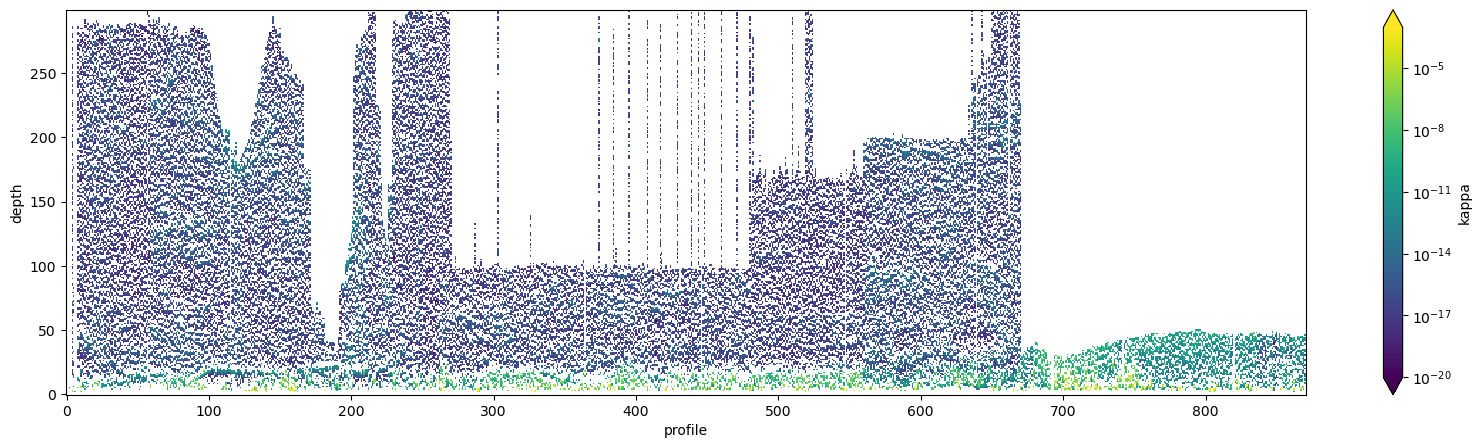

In [78]:
arctic_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/arctic_mix.nc"
arctic_ds = xr.open_dataset(arctic_nc)

arctic_k = calc_N2_kappa(arctic_ds)
# arctic mix
arctic_k.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 1e-20, vmax = 1e-3),cmap='viridis',figsize=(20,5))

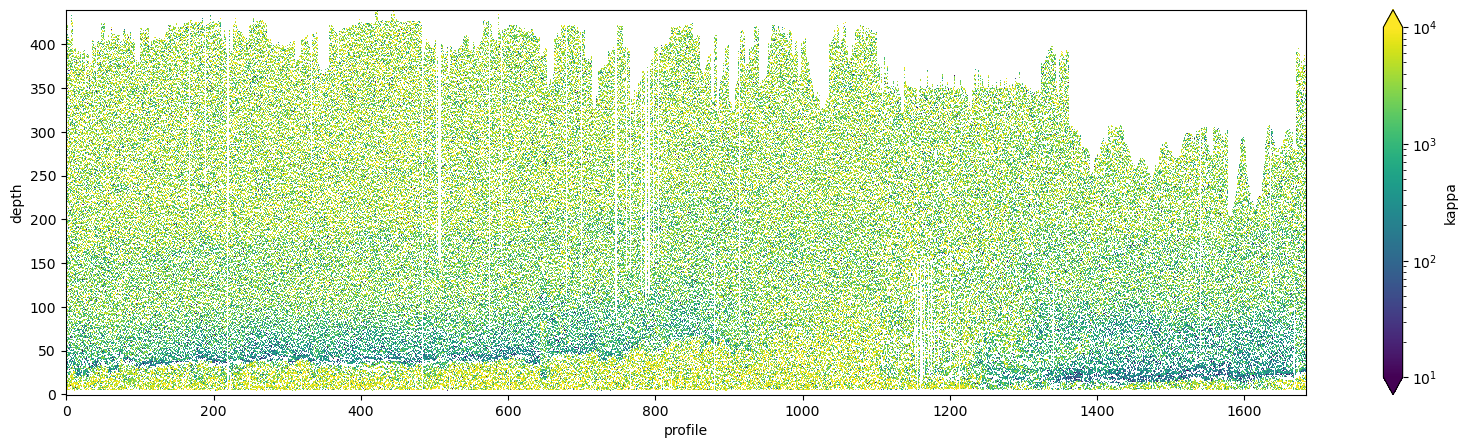

In [81]:
mosaic_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/mosaic_ds.nc"
mosaic_ds = xr.open_dataset(mosaic_nc)
mosaic_k = calc_N2_kappa(mosaic_ds)
mosaic_k.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 10, vmax = 10000),cmap='viridis',figsize=(20,5))

/var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_5065/3698127424.py:5: RuntimeWarning: divide by zero encountered in divide
  return (9.81 / rho) * drho / deps
/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


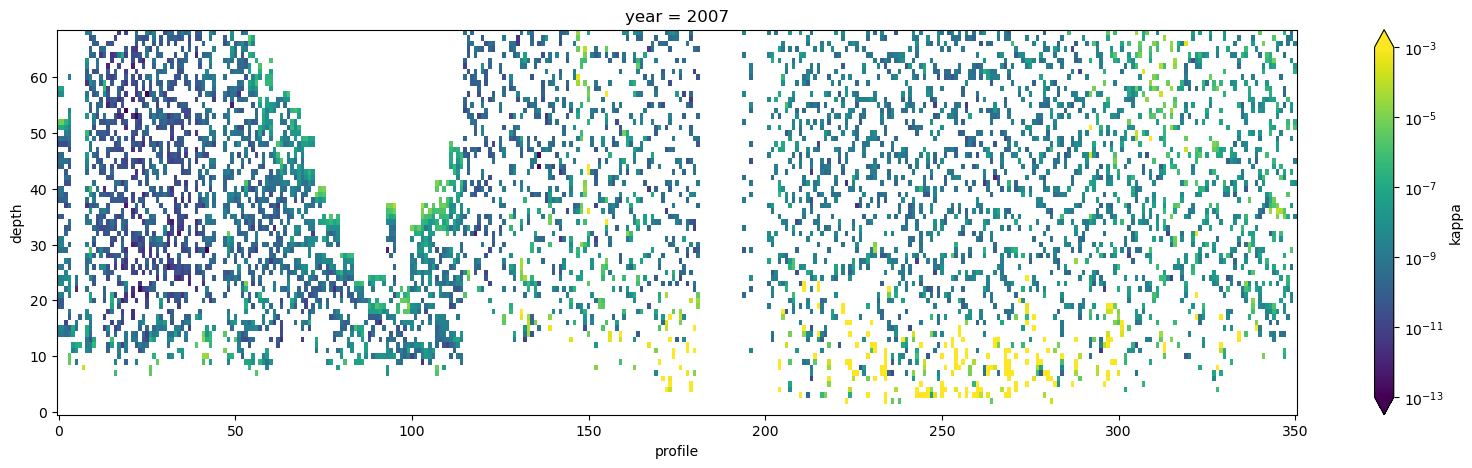

In [87]:
alberto_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/alberto_ds.nc"
alberto_ds = xr.open_dataset(alberto_nc)

alberto_k = calc_N2_kappa(alberto_ds)
# arctic mix
alberto_k.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 1e-13, vmax = 1e-3),cmap='viridis',figsize=(20,5))

/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/xarray/core/computation.py:760: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


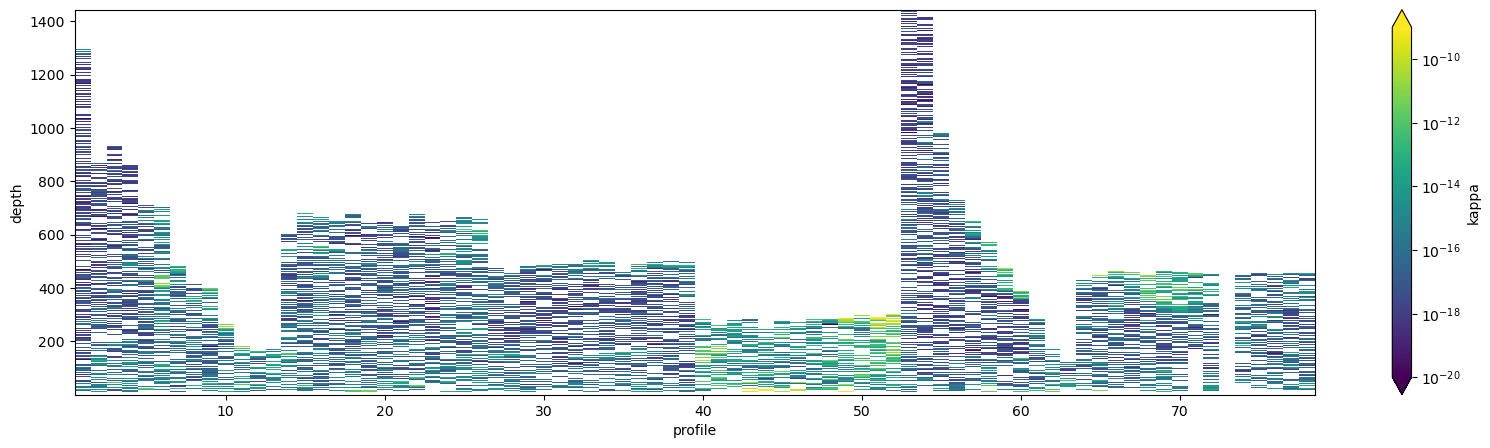

In [92]:
HM_nc = "/Users/Lisanne/Documents/AI4ER/Mres/ArcticTurbulence/data/processed_data/HM_ds.nc"
HM_ds = xr.open_dataset(HM_nc)

HM_k = calc_N2_kappa(HM_ds)
HM_k.kappa.plot(y = 'depth',norm = colors.LogNorm(vmin = 1e-20, vmax = 1e-9),cmap='viridis',figsize=(20,5))